[View in Colaboratory](https://colab.research.google.com/github/PGrabinski/KerasTutorial/blob/master/Chapter7.ipynb)

# Chapter 7

## Functional API

In [2]:
from keras import Input, layers
from keras.models import Sequential, Model

seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))
seq_model.summary()

input_tensor = Input(shape=(64, ))
dense = layers.Dense(32, activation='relu')(input_tensor)
dense = layers.Dense(32, activation='relu')(dense)
output_tensor = layers.Dense(10, activation='softmax')(dense)
model = Model(input_tensor, output_tensor)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11

### Multi-input models

In [1]:
from keras.models import Model
from keras.layers import LSTM, Dense, Embedding, concatenate
from keras import Input, layers
import numpy as np

text_voc_size = 10000
question_voc_size = 10000
answer_voc_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = Embedding(text_voc_size, 64)(text_input)
encoded_text = LSTM(32)(embedded_text)

question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = Embedding(question_voc_size, 32)(question_input)
encoded_question = LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)

answer = Dense(answer_voc_size, activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)
model. compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
question (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 64)     640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 32)     320000      question[0][0]                   
__________________________________________________________________________________________________
lstm_1 (LS

In [18]:
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install pydot
!pip install graphviz
!add-apt-repository ppa:gviz-adm/graphviz-dev
!apt-get update
!apt-get install graphviz-dev

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
/bin/sh: 1: add-apt-repository: not found
Hit:1 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz-dev is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


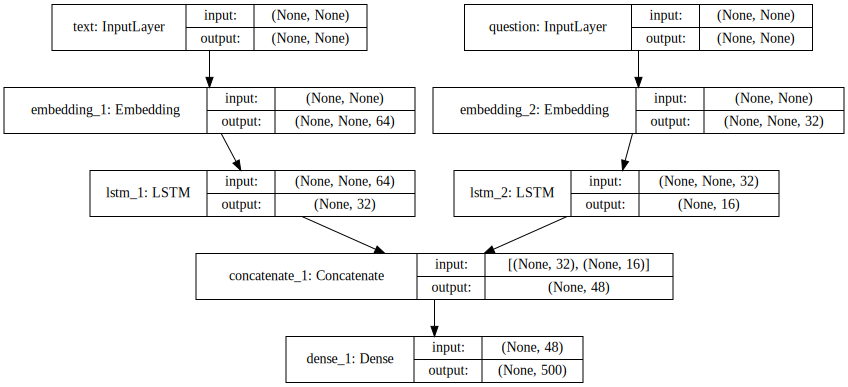

In [3]:
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# from keras.utils import plot_model
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [2]:
samples = 1000
max_len = 100
text = np.random.randint(1, text_voc_size, size=(samples, max_len))
question = np.random.randint(1, question_voc_size, size=(samples, max_len))
answers = np.random.randint(0, 2, size=(samples, answer_voc_size))
print(answers)
model.fit({'text':text, 'question':question}, answers, epochs=10, batch_size=128)

[[1 0 1 ... 1 0 0]
 [1 1 1 ... 1 0 0]
 [1 0 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 0 1]
 [1 0 1 ... 0 0 1]
 [1 1 1 ... 0 1 1]]
Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1549.6925 - acc: 0.0000e+00
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1549.5514 - acc: 0.0000e+00
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1549.4031 - acc: 0.0000e+00
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1549.1403 - acc: 0.0000e+00
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1548.8006 - acc: 0.0000e+00
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1548.4321 - acc: 1.0000e-03
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1548.0540 - acc: 0.0050
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1547.6957 - acc: 0.0090
Epoch 9/10
1000/1000 [==============================] - 

### Multi-output models

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 256)    12800000    posts[0][0]                      
__________________________________________________________________________________________________
first_conv1d (Conv1D)           (None, None, 128)    163968      embedding_4[0][0]                
__________________________________________________________________________________________________
max_pooling1d_3 (MaxPooling1D)  (None, None, 128)    0           first_conv1d[0][0]               
__________________________________________________________________________________________________
conv1d_6 (

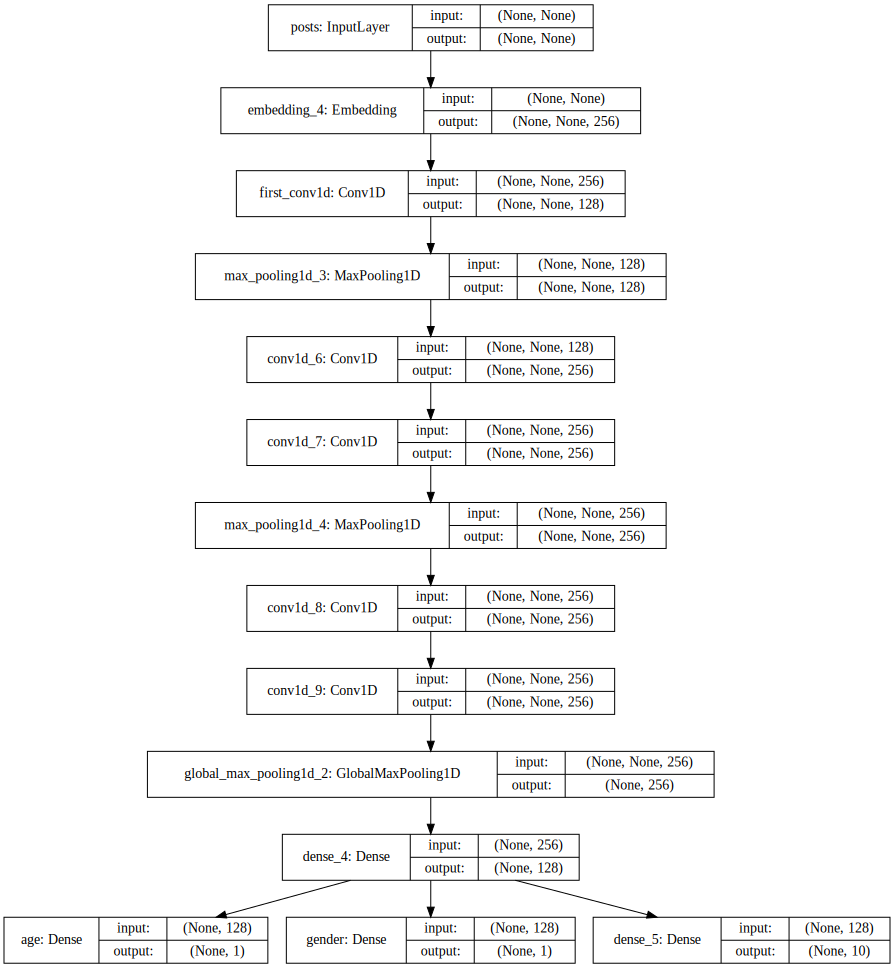

In [5]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras import Input
from keras.models import Model

voc_size = 50000
income_groups = 10

posts_input = Input(shape=(None,), dtype=np.int32, name='posts')
embedded_posts = Embedding(voc_size, 256)(posts_input)
x = Conv1D(128, 5, activation='relu', name='first_conv1d')(embedded_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu')(x)
x = Conv1D(256, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation='relu')(x)
x = Conv1D(256, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)

age_pred = Dense(1, name='age')(x)
gender_pred = Dense(1, activation='sigmoid', name='gender')(x)
income_pred = Dense(income_groups, activation='softmax')(x)

model = Model(posts_input, [age_pred, gender_pred, income_pred])
model.summary()
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [0]:
model.compile(optimizer='rmsprop', loss={'age':'mse','gender':'binary_crossentropy','income':'categorical_crossentropy'}, loss_weights={'age':0.25, 'income':1., 'gender':10.})
model.fit(posts, {'age':age_targets,'income':income_targets,'gender':gender_targets}, epochs=10, batch_size=64)

### Directed acyclic graphs

#### V3 implementation

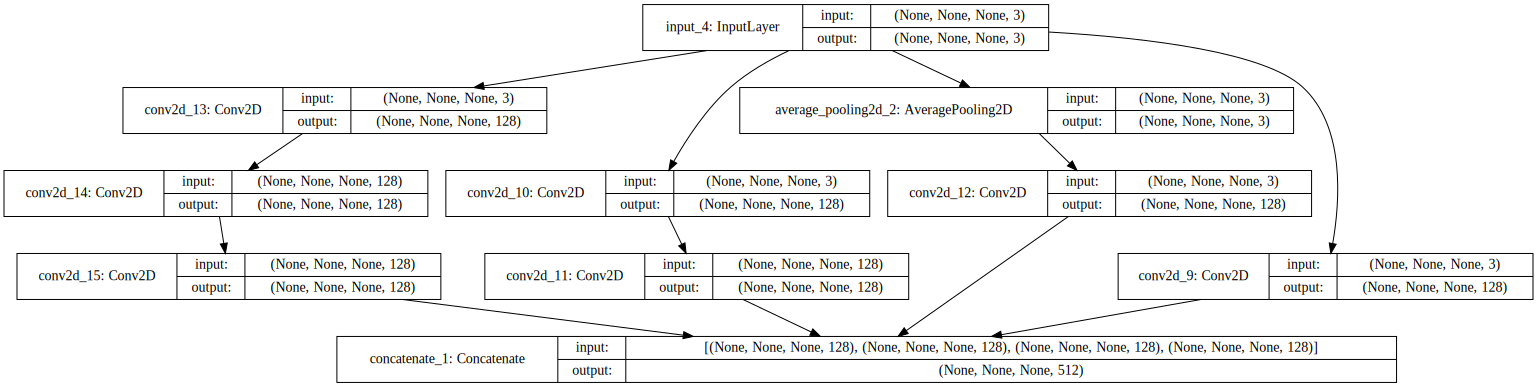

In [5]:
from keras import layers
from keras.models import Model
from keras import Input
import numpy as np
x = Input(shape=(None, None, 3), dtype='float32')

path_a = layers.Conv2D(128, 1, activation='relu', strides=2)(x)

path_b = layers.Conv2D(128, 1, activation='relu')(x)
path_b = layers.Conv2D(128, 3, activation='relu', strides=2)(path_b)

path_c = layers.AveragePooling2D(3, strides=2)(x)
path_c = layers.Conv2D(128, 3, activation='relu', strides=2)(path_c)

path_d = layers.Conv2D(128, 1, activation='relu')(x)
path_d = layers.Conv2D(128, 3, activation='relu')(path_d)
path_d = layers.Conv2D(128, 3, activation='relu', strides=2)(path_d)

output = layers.concatenate([path_a, path_b, path_c, path_d], axis=-1)

model = Model(x, output)

import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))


#### Residual connections

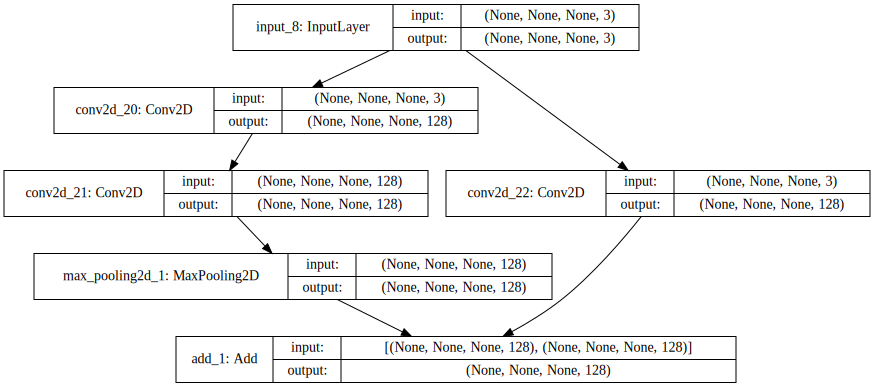

In [9]:
from keras import layers
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

x = Input(shape=(None, None,3), dtype='float32')

y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.MaxPooling2D(2, strides=2)(y)

residual = layers.Conv2D(128, 1, strides=2, padding='same')(x)

output = layers.add([y, residual])

model = Model(x, output)
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

#### Layer weight sharing

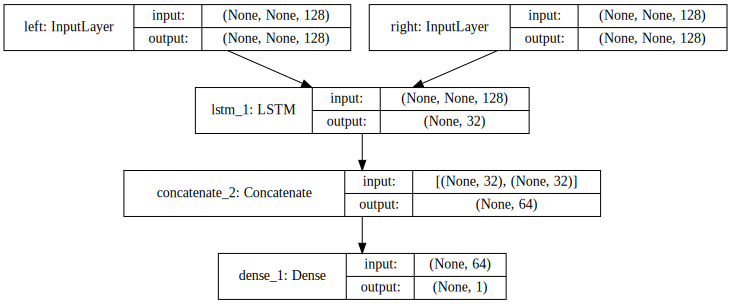

In [11]:
from keras import layers, Input
from keras.models import Model

text_proc = layers.LSTM(32)

left_input = Input(shape=(None, 128), name='left')
left_output = text_proc(left_input)

right_input = Input(shape=(None, 128), name='right')
right_output = text_proc(right_input)

sim = layers.concatenate([left_output, right_output], axis = -1)
estimator = layers.Dense(1, activation='sigmoid')(sim)

model = Model([left_input, right_input], estimator)
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))


#### Models as layers

## TensorBoard

In [0]:
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len, name='embedding'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))

import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
plot_model(model)


In [0]:
!mkdir my_log_dir

In [25]:
from keras import callbacks
callbacks = [ callbacks.TensorBoard(log_dir='my_log_dir', histogram_freq=1, embeddings_freq=1)]
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=callbacks)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 79s 4ms/step - loss: 0.5402 - acc: 0.7104 - val_loss: 0.3661 - val_acc: 0.8430
Epoch 2/20
20000/20000 [==============================] - 79s 4ms/step - loss: 0.3275 - acc: 0.8606 - val_loss: 0.3228 - val_acc: 0.8680
Epoch 3/20
 9856/20000 [=============>................] - ETA: 37s - loss: 0.2784 - acc: 0.8857

20000/20000 [==============================] - 80s 4ms/step - loss: 0.2827 - acc: 0.8832 - val_loss: 0.3897 - val_acc: 0.8368
Epoch 4/20
20000/20000 [==============================] - 80s 4ms/step - loss: 0.2487 - acc: 0.9013 - val_loss: 0.3422 - val_acc: 0.8566
Epoch 5/20
20000/20000 [==============================] - 80s 4ms/step - loss: 0.2156 - acc: 0.9168 - val_loss: 0.3267 - val_acc: 0.8690
Epoch 6/20
  256/20000 [..............................] - ETA: 1:13 - loss: 0.1824 - acc: 0.9336

20000/20000 [==============================] - 80s 4ms/step - loss: 0.1828 - acc: 0.9311 - val_loss: 0.3393 - val_acc: 0.8620
Epoch 7/20
20000/20000 [==============================] - 79s 4ms/step - loss: 0.1474 - acc: 0.9473 - val_loss: 0.4077 - val_acc: 0.8478
Epoch 8/20
18432/20000 [==========================>...] - ETA: 5s - loss: 0.1127 - acc: 0.9642

20000/20000 [==============================] - 80s 4ms/step - loss: 0.1148 - acc: 0.9631 - val_loss: 0.4388 - val_acc: 0.8490
Epoch 9/20
20000/20000 [==============================] - 79s 4ms/step - loss: 0.0838 - acc: 0.9748 - val_loss: 0.5023 - val_acc: 0.8362
Epoch 10/20
20000/20000 [==============================] - 80s 4ms/step - loss: 0.0565 - acc: 0.9859 - val_loss: 0.4527 - val_acc: 0.8588
Epoch 11/20
 1664/20000 [=>............................] - ETA: 1:07 - loss: 0.0273 - acc: 0.9976

20000/20000 [==============================] - 79s 4ms/step - loss: 0.0350 - acc: 0.9922 - val_loss: 0.5247 - val_acc: 0.8542
Epoch 12/20
20000/20000 [==============================] - 80s 4ms/step - loss: 0.0221 - acc: 0.9953 - val_loss: 0.5671 - val_acc: 0.8592
Epoch 13/20
18560/20000 [==========================>...] - ETA: 5s - loss: 0.0129 - acc: 0.9981

20000/20000 [==============================] - 80s 4ms/step - loss: 0.0126 - acc: 0.9981 - val_loss: 0.6090 - val_acc: 0.8580
Epoch 14/20
20000/20000 [==============================] - 80s 4ms/step - loss: 0.0084 - acc: 0.9981 - val_loss: 0.6747 - val_acc: 0.8566
Epoch 15/20
20000/20000 [==============================] - 80s 4ms/step - loss: 0.0047 - acc: 0.9991 - val_loss: 0.7433 - val_acc: 0.8568
Epoch 16/20
 1664/20000 [=>............................] - ETA: 1:08 - loss: 0.0102 - acc: 0.9994

20000/20000 [==============================] - 80s 4ms/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.7792 - val_acc: 0.8578
Epoch 17/20
20000/20000 [==============================] - 78s 4ms/step - loss: 0.0022 - acc: 0.9997 - val_loss: 0.8757 - val_acc: 0.8516
Epoch 18/20
18560/20000 [==========================>...] - ETA: 5s - loss: 0.0015 - acc: 0.9999

20000/20000 [==============================] - 79s 4ms/step - loss: 0.0014 - acc: 0.9999 - val_loss: 0.8890 - val_acc: 0.8550
Epoch 19/20
20000/20000 [==============================] - 79s 4ms/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.9333 - val_acc: 0.8564
Epoch 20/20
20000/20000 [==============================] - 80s 4ms/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.9560 - val_acc: 0.8564


In [26]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2018-07-23 09:23:17--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.206.9.96, 52.0.104.144, 34.239.63.98, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.206.9.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  10.1MB/s    in 0.5s    

2018-07-23 09:23:18 (10.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './my_log_dir'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [28]:
get_ipython().system_raw('./ngrok http 6006 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://da82d824.ngrok.io
